In [24]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

Standalone Python scripts were used to generate this final 3rdpass_cleaned.tsv that is our final deliverable
for the problem "Can we predict the star rating based on the review body?" Before we attempt to solve that question
we are performing some EDA, SDA, and basic data visualizing. 

In [3]:
third_pass = pd.read_csv('3rdpass_cleaned.tsv', sep='\t', quoting=csv.QUOTE_NONE)

In [12]:
# Create another column that holds the length of each review body
third_pass['Review_Body'] = third_pass['Review_Body'].apply(str)
third_pass['Length_Review_Body'] = third_pass['Review_Body'].apply(len)

In [20]:
# Create an integer date column
third_pass['Integer_Date'] = third_pass['Review_Date'].apply(lambda x: int(x[0:4] + x[5:7] + x[8:10]))

In [21]:
third_pass.head()

,Title,Star_Rating,Total_Votes,Review_Body,Review_Date,Length_Review_Body,Integer_Date
0,The Book of Life (All Souls),5,0,Love Deborah Harness's Trilogy! Didn't want t...,2015-08-31,174,20150831
1,CompTIA A+ Certification All-in-One Exam Guide...,5,0,Bought this book for my boyfriend. He said it ...,2015-08-31,118,20150831
2,The Encyclopedia of Infant and Toddlers Activi...,5,0,Excellent resource.,2015-08-31,19,20150831
3,Pearson Reviews & Rationales: Medical-Surgical...,5,0,This was very helpful for my Med-Surg class! I...,2015-08-31,191,20150831
4,Forming Intentional Disciples: The Path to Kno...,5,0,This book inspired me not to nly looke at my o...,2015-08-31,245,20150831


In [22]:
# Basic describe. Notably most reviews have a star rating of 5 
third_pass.describe()

,Star_Rating,Total_Votes,Length_Review_Body,Integer_Date
count,2.668988e+06,2.668988e+06,2.668988e+06,2.668988e+06
mean,4.548807e+00,2.016235e+00,2.627587e+02,2.013937e+07
std,9.299195e-01,1.392677e+01,5.752927e+02,9.203452e+03
min,1.000000e+00,0.000000e+00,1.000000e+00,2.012050e+07
25%,4.000000e+00,0.000000e+00,6.800000e+01,2.013082e+07
50%,5.000000e+00,0.000000e+00,1.400000e+02,2.014063e+07
75%,5.000000e+00,1.000000e+00,2.620000e+02,2.015020e+07
max,5.000000e+00,4.756000e+03,4.952100e+04,2.015083e+07


In [23]:
# Min and Max of date
print(third_pass['Integer_Date'].min(), third_pass['Integer_Date'].max())

20120503 20150831


In [15]:
# Of the 2.7 million reviews, almost 2 million are 5's 
third_pass['Star_Rating'].value_counts()

5    1994101
4     366531
3     160601
2      74524
1      73231
Name: Star_Rating, dtype: int64

In [17]:
# Average review length and average total votes for each star rating
third_pass.groupby(['Star_Rating']).mean()

,Total_Votes,Length_Review_Body
Star_Rating,,
1,14.537969,412.209938
2,6.375450,438.537022
3,3.669728,358.287196
4,1.454605,303.058407
5,1.363538,235.599957


In [27]:
# How do the trends change over time?
star_by_date = third_pass[['Star_Rating', 'Integer_Date']].groupby('Integer_Date').mean().reset_index()

In [28]:
star_by_date.head()

,Integer_Date,Star_Rating
0,20120503,4.447937
1,20120504,4.332721
2,20120505,4.421659
3,20120506,4.312360
4,20120507,4.325217


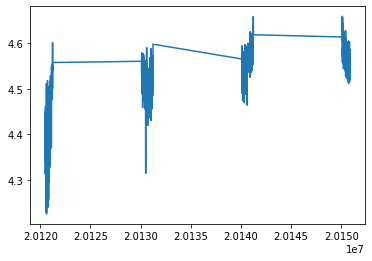

In [29]:
plt.plot(star_by_date['Integer_Date'], star_by_date['Star_Rating'])